### 아파트 단지 폴리곤데이터 확인하기

KRX 전국 아파트단지 폴리곤데이터 전처리 
용인시내의 폴리곤만 추출 / PNU코드->지번코드로 변경하여 아파트 이름 얻어내기

In [ ]:
import json
import requests

# 아파트 건물정보 json파일 불러오기 

with open("/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/아파트단지별구역정보(POLYGON).json") as f:
    contents = f.read() # string 타입
    json_data = json.loads(contents)


In [ ]:
len(json_data)

406756

In [ ]:
# I = 토지 / b = 건물
df_aptinfo = pd.DataFrame(json_data)
df_aptinfo

,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,64997,2714012300103770007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872821,128.713170,None
1,64997,2714012300103770020,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872828,128.712973,None
2,55111,1111010900100400000,"{""type"": ""Polygon"", ""coordinates"": [[[126.9662...",l,37.580694,126.966339,None
3,37706,1150010300110520011,"{""type"": ""Polygon"", ""coordinates"": [[[126.8401...",l,37.542610,126.840156,None
4,65768,4827010400103550007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7510...",l,35.487799,128.750888,None
...,...,...,...,...,...,...,...
406751,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",l,37.547579,127.139133,None
406752,105987,1174010900100370009,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547739,127.139154,2001212226914495054200000000
406753,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547587,127.139159,2001212227904494893000000000
406754,105988,1174010900100380016,"{""type"": ""Polygon"", ""coordinates"": [[[127.1389...",l,37.545860,127.138856,None


In [ ]:
df_aptinfo[df_aptinfo['PNU'].str.startswith('4146')]

,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
4639,75375,4146125321104790007,"{""type"": ""Polygon"", ""coordinates"": [[[127.2511...",l,37.334535,127.251074,None
4640,75375,4146125321104790029,"{""type"": ""Polygon"", ""coordinates"": [[[127.2511...",l,37.334424,127.251291,None
24499,75424,4146310300101200013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1080...",l,37.269103,127.107884,None
24651,81,4146510600107260000,"{""type"": ""Polygon"", ""coordinates"": [[[127.0751...",l,37.318210,127.073024,None
24652,81,4146510600107260000,"{""type"": ""Polygon"", ""coordinates"": [[[127.0710...",b,37.316818,127.071204,2002206241794238704300000000
...,...,...,...,...,...,...,...
394710,100702,4146510500101300007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0721...",l,37.327801,127.072005,None
400602,103339,4146110100103350002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2000...",l,37.233745,127.199941,None
400603,103339,4146110100103350010,"{""type"": ""Polygon"", ""coordinates"": [[[127.1996...",l,37.233564,127.199818,None
400604,103339,4146110100103350002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2001...",b,37.233782,127.199940,1990217672224146710400000000


In [ ]:
len(df_aptinfo['LA'].dropna().tolist())

406046

In [ ]:
df_aptinfo['BLDID_ID'].value_counts()

81934    252
7736     229
8475     194
11082    194
58418    191
        ... 
95639      1
60116      1
73445      1
95644      1
40910      1
Name: BLDID_ID, Length: 84022, dtype: int64

In [ ]:
# 데이터프레임 인덱스도 맞춰주기 (la,lo 결측값 drop)
ind = df_aptinfo['LA'].dropna().index

ind = df_aptinfo.drop(ind).index

df_aptinfo = df_aptinfo.drop(ind)
df_aptinfo = df_aptinfo.reset_index()
df_aptinfo

,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,0,64997,2714012300103770007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872821,128.713170,None
1,1,64997,2714012300103770020,"{""type"": ""Polygon"", ""coordinates"": [[[128.7129...",l,35.872828,128.712973,None
2,2,55111,1111010900100400000,"{""type"": ""Polygon"", ""coordinates"": [[[126.9662...",l,37.580694,126.966339,None
3,3,37706,1150010300110520011,"{""type"": ""Polygon"", ""coordinates"": [[[126.8401...",l,37.542610,126.840156,None
4,4,65768,4827010400103550007,"{""type"": ""Polygon"", ""coordinates"": [[[128.7510...",l,35.487799,128.750888,None
...,...,...,...,...,...,...,...,...
406041,406751,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",l,37.547579,127.139133,None
406042,406752,105987,1174010900100370009,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547739,127.139154,2001212226914495054200000000
406043,406753,105987,1174010900100370013,"{""type"": ""Polygon"", ""coordinates"": [[[127.1392...",b,37.547587,127.139159,2001212227904494893000000000
406044,406754,105988,1174010900100380016,"{""type"": ""Polygon"", ""coordinates"": [[[127.1389...",l,37.545860,127.138856,None


In [ ]:
# 용인시 안에있는 폴리곤 걸러내기 
a = eval(df_aptinfo['PYN_CN'][0])

a['coordinates']

[[[128.712955216202, 35.8727519854815],
  [128.712970246963, 35.8729034486104],
  [128.712971646397, 35.8729175564408],
  [128.713143298545, 35.8729091994058],
  [128.713235366018, 35.8729045445923],
  [128.713262472179, 35.872901698602],
  [128.713322010377, 35.8728960824638],
  [128.71334786161, 35.8728973070678],
  [128.713385498681, 35.8728606986629],
  [128.713372685543, 35.872766307679],
  [128.713330141484, 35.8727360860731],
  [128.71333581877, 35.8727247350006],
  [128.71324896121, 35.8727340257727],
  [128.713062767863, 35.8727461693287],
  [128.712955216202, 35.8727519854815]]]

In [ ]:
a['coordinates'][0][0]

[128.712955216202, 35.8727519854815]

In [ ]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [ ]:
b=[]
for i in range(len(a['coordinates'][0])):
  b.append(tuple(a['coordinates'][0][i])) 

In [ ]:
b

[(128.712955216202, 35.8727519854815),
 (128.712970246963, 35.8729034486104),
 (128.712971646397, 35.8729175564408),
 (128.713143298545, 35.8729091994058),
 (128.713235366018, 35.8729045445923),
 (128.713262472179, 35.872901698602),
 (128.713322010377, 35.8728960824638),
 (128.71334786161, 35.8728973070678),
 (128.713385498681, 35.8728606986629),
 (128.713372685543, 35.872766307679),
 (128.713330141484, 35.8727360860731),
 (128.71333581877, 35.8727247350006),
 (128.71324896121, 35.8727340257727),
 (128.713062767863, 35.8727461693287),
 (128.712955216202, 35.8727519854815)]

In [ ]:
df_aptinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406046 entries, 0 to 406045
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   index     406046 non-null  int64  
 1   BLDID_ID  406046 non-null  int64  
 2   PNU       406046 non-null  object 
 3   PYN_CN    406046 non-null  object 
 4   SCTN_CD   406046 non-null  object 
 5   LA        406046 non-null  float64
 6   LO        406046 non-null  float64
 7   UFID      288568 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.8+ MB


In [ ]:
# index에 해당하는 데이터프레임 추출 
df_aptYongin = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/용인시아파트토지만정렬.csv')


df_aptYongin

,Unnamed: 0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN
1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN
2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN
3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN
4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN
...,...,...,...,...,...,...,...,...,...
1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN
1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN
1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN
1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN


In [ ]:
df_aptYongin['SCTN_CD'].value_counts()

l    1480
Name: SCTN_CD, dtype: int64

아파트별 폴리곤내에 포함되는 count만 세어서 데이터프레임 만들어주기 

In [ ]:
# 아파트별 폴리곤 내에 빅콘count가 포함되는지 여부 

# 빅콘데이터 격자로 만들때 사용한 bound를 사각형 polygon으로 바꿔주기 

# haversine 함수로 만들기

def get_polygon (coordinate):
  north = inverse_haversine(coordinate, 25, Direction.NORTH, unit='m')
  up_right = inverse_haversine(north, 25, Direction.EAST, unit='m')
  up_left = inverse_haversine(north, 25, Direction.WEST, unit='m')


  south = inverse_haversine(coordinate, 25, Direction.SOUTH, unit='m')
  dn_left = inverse_haversine(south, 25, Direction.WEST, unit='m')
  dn_right = inverse_haversine(south, 25, Direction.EAST, unit='m')

  # polygon y/x 위치 바꾸기 
  up_right=[up_right[1],up_right[0]]
  up_left=[up_left[1],up_left[0]]
  dn_right=[dn_right[1],dn_right[0]]
  dn_left=[dn_left[1],dn_left[0]]


  return [up_right,dn_right,dn_left,up_left]


In [ ]:
test_polygon=[]
for j in tqdm(range(len(cell))):
   test_polygon.append( [ cell['cell_ycrd'][j],cell['cell_xcrd'][j] ] )


polygons=[]
for i in tqdm(range(len(test_polygon))):
  polygons.append(get_polygon(test_polygon[i]))

100%|██████████| 12375/12375 [00:00<00:00, 29480.75it/s]


In [ ]:
poly = []
for i in range(len(polygons)):
  poly.append( {'type': 'Polygon', 'coordinates':[polygons[i]]} )
len(poly)

12375

In [ ]:
poly[0]

{'type': 'Polygon',
 'coordinates': [[[127.23093200021611, 37.12988282975696],
   [127.23093199854053, 37.12943316957511],
   [127.23036800145947, 37.12943316957511],
   [127.23036799978388, 37.12988282975696]]]}

In [ ]:
for i in tqdm(range(12375)):
  folium.GeoJson(poly[i], name = '지역구').add_to(m)

100%|██████████| 12375/12375 [00:00<00:00, 67968.18it/s]


In [ ]:
#m

In [ ]:
poly[0]

{'type': 'Polygon',
 'coordinates': [[[127.23093200021611, 37.12988282975696],
   [127.23093199854053, 37.12943316957511],
   [127.23036800145947, 37.12943316957511],
   [127.23036799978388, 37.12988282975696]]]}

In [ ]:
poly[0]

{'type': 'Polygon',
 'coordinates': [[[127.23093200021611, 37.12988282975696],
   [127.23093199854053, 37.12943316957511],
   [127.23036800145947, 37.12943316957511],
   [127.23036799978388, 37.12988282975696]]]}

In [ ]:
def get_polygon_tuple (coordinate):
  north = inverse_haversine(coordinate, 25, Direction.NORTH, unit='m')
  up_right = inverse_haversine(north, 25, Direction.EAST, unit='m')
  up_left = inverse_haversine(north, 25, Direction.WEST, unit='m')


  south = inverse_haversine(coordinate, 25, Direction.SOUTH, unit='m')
  dn_left = inverse_haversine(south, 25, Direction.WEST, unit='m')
  dn_right = inverse_haversine(south, 25, Direction.EAST, unit='m')

  up_right=[up_right[1],up_right[0]]
  up_left=[up_left[1],up_left[0]]
  dn_right=[dn_right[1],dn_right[0]]
  dn_left=[dn_left[1],dn_left[0]]

  return [up_right,dn_right,dn_left,up_left]

In [ ]:
# 폴리곤은 x,y 127/37
test_polygon=[]
for j in tqdm(range(len(cell))):
   test_polygon.append( [ cell['cell_ycrd'][j],cell['cell_xcrd'][j] ] )


polygons=[]
for i in tqdm(range(len(test_polygon))):
  polygons.append(get_polygon_tuple(test_polygon[i]))

100%|██████████| 12375/12375 [00:00<00:00, 17155.47it/s]


In [ ]:
polygons[0]

[[127.23093200021611, 37.12988282975696],
 [127.23093199854053, 37.12943316957511],
 [127.23036800145947, 37.12943316957511],
 [127.23036799978388, 37.12988282975696]]

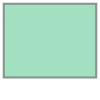

In [ ]:
polygon_square = Polygon(polygons[0])
polygon_square

In [ ]:
토지들만정렬 = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/용인시아파트토지만정렬.csv')

In [ ]:
# a = 아파트토지들 polygon tuple형태로 들어있는 리스트 
아파트토지들=[]
for j in tqdm(range(len(토지들만정렬['PYN_CN'].values))):
  b = []
  for i in range(len(eval(토지들만정렬['PYN_CN'].values[j])['coordinates'][0])):
    b.append( ( eval( 토지들만정렬['PYN_CN'].values[j] )['coordinates'][0][i][0],eval( 토지들만정렬['PYN_CN'].values[j] )['coordinates'][0][i][1] ) )
  아파트토지들.append(b)
len(아파트토지들)

100%|██████████| 1480/1480 [00:28<00:00, 51.74it/s] 


1480

In [ ]:
아파트토지들[0]

[(127.215145663581, 37.2858888306712),
 (127.215118745418, 37.2858487203357),
 (127.214889635598, 37.2860162746175),
 (127.214889601794, 37.2860162836887),
 (127.214933687933, 37.2861579272333),
 (127.214957705037, 37.286200989208),
 (127.21519840622, 37.286028899715),
 (127.215161639928, 37.285927735348),
 (127.215145663581, 37.2858888306712)]

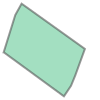

In [ ]:
Polygon(아파트토지들[0])

In [ ]:
# cell별 count와 중복되는 아파트 폴리곤만 뽑아내기 

In [ ]:
# j = cell 데이터프레임의 index번호
# i = 아파트토지들만 정렬의 index번호  

cell_index=[]

for i in tqdm(range(len(아파트토지들))):
  for j in range(len(polygons)):
    
    polygon_square = Polygon(polygons[j])  
    if polygon_square.overlaps(Polygon(아파트토지들[i])) == True:
      
      cell_index.append([i,j])
      



100%|██████████| 1480/1480 [10:30<00:00,  2.35it/s]


In [ ]:
within = cell_index
len(within) 

5553

In [ ]:
len(cell_index)

apt_idx=[]
cell_idx=[]

for i in range(len(cell_index)):
  apt_idx.append(cell_index[i][0])
for j in range(len(cell_index)):
  cell_idx.append(cell_index[j][1])

In [ ]:
len(set(apt_idx))

1276

### PNU코드 지번으로 바꾸기 

- 아파트별 경계를 폴리곤형태로 제공하는 데이터의 읍면동과 지번주소를 파악하기 위해 PNU코드를 지번으로 가공 
- 법정동코드와의 일치여부를 정규표현식 startswith로 확인 후 추출 

In [ ]:
# df_apt_idx = 아파트별 폴리곤 데이터 
df_apt_idx = df_apt_idx.drop([103, 104, 105, 106, 107, 108, 866, 1052])
df_apt_idx 

,Unnamed: 0,level_0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID
0,0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN
1,1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN
2,2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN
3,3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN
4,4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN
1272,1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN
1273,1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN
1274,1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN


In [ ]:
# 지번데이터 불러오기 
import pandas as pd
지번txt = pd.read_csv('/content/gdrive/MyDrive/법정동코드 전체자료.txt', delimiter = '\t',encoding='cp949')
# 지번txt.loc[6338] = ['41','용인시','존재']
지번txt = 지번txt[지번txt['법정동명'].str.contains('용인시')]
지번txt = 지번txt[지번txt['폐지여부'] == '존재']
# 상세주소가 아닌 지역 drop 
지번txt = 지번txt.drop([6057,6190,6201,6211,6220,6230,6273,6286,6300,6311,6330])

지번txt

,법정동코드,법정동명,폐지여부
6191,4146110100,경기도 용인시 처인구 김량장동,존재
6192,4146110200,경기도 용인시 처인구 역북동,존재
6193,4146110300,경기도 용인시 처인구 삼가동,존재
6194,4146110400,경기도 용인시 처인구 남동,존재
6195,4146110500,경기도 용인시 처인구 유방동,존재
...,...,...,...
6333,4146510300,경기도 용인시 수지구 동천동,존재
6334,4146510400,경기도 용인시 수지구 고기동,존재
6335,4146510500,경기도 용인시 수지구 신봉동,존재
6336,4146510600,경기도 용인시 수지구 성복동,존재


In [ ]:
str법정동코드 = []
for i in range(len(지번txt['법정동코드'])):
  str법정동코드.append(str(지번txt['법정동코드'].values[i]))

지번txt['str법정동코드'] = str법정동코드
지번txt


,법정동코드,법정동명,폐지여부,str법정동코드
6191,4146110100,경기도 용인시 처인구 김량장동,존재,4146110100
6192,4146110200,경기도 용인시 처인구 역북동,존재,4146110200
6193,4146110300,경기도 용인시 처인구 삼가동,존재,4146110300
6194,4146110400,경기도 용인시 처인구 남동,존재,4146110400
6195,4146110500,경기도 용인시 처인구 유방동,존재,4146110500
...,...,...,...,...
6333,4146510300,경기도 용인시 수지구 동천동,존재,4146510300
6334,4146510400,경기도 용인시 수지구 고기동,존재,4146510400
6335,4146510500,경기도 용인시 수지구 신봉동,존재,4146510500
6336,4146510600,경기도 용인시 수지구 성복동,존재,4146510600


In [ ]:
strPNU = []
for i in range(len(df_apt_idx['PNU'])):
  strPNU.append(str(df_apt_idx['PNU'].values[i]))

df_apt_idx['strPNU'] = strPNU
df_apt_idx

,Unnamed: 0,level_0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID,strPNU
0,0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN,4146125027103750002
1,1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN,4146125027103750010
2,2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN,4146125027103750011
3,3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN,4146125027103750006
4,4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN,4146125021101150002
...,...,...,...,...,...,...,...,...,...,...,...
1271,1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN,4146510700100960003
1272,1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN,4146510700100960005
1273,1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN,4146510700100960006
1274,1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN,4146510700100960007


In [ ]:
법정동 = []
idx = []
for j in range(len(df_apt_idx['strPNU'])):
  for i in range(len(지번txt['str법정동코드'])): 
    if df_apt_idx['strPNU'].values[j].startswith(지번txt['str법정동코드'].values[i]):
      법정동.append(지번txt['법정동명'].values[i]) 
      idx.append(j)
df_apt_idx['법정동'] = 법정동
df_apt_idx


,Unnamed: 0,level_0,index,BLDID_ID,PNU,PYN_CN,SCTN_CD,LA,LO,UFID,strPNU,법정동
0,0,31090,31169,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",l,37.286025,127.215044,NaN,4146125027103750002,경기도 용인시 처인구 포곡읍 전대리
1,1,31091,31170,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",l,37.285809,127.214861,NaN,4146125027103750010,경기도 용인시 처인구 포곡읍 전대리
2,2,31092,31171,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",l,37.286003,127.214605,NaN,4146125027103750011,경기도 용인시 처인구 포곡읍 전대리
3,3,31093,31172,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",l,37.286389,127.214296,NaN,4146125027103750006,경기도 용인시 처인구 포곡읍 전대리
4,4,66626,66843,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",l,37.296869,127.234921,NaN,4146125021101150002,경기도 용인시 처인구 포곡읍 삼계리
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1475,208137,208652,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.310262,127.080135,NaN,4146510700100960003,경기도 용인시 수지구 상현동
1272,1476,208138,208653,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",l,37.310453,127.080587,NaN,4146510700100960005,경기도 용인시 수지구 상현동
1273,1477,208139,208654,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",l,37.309871,127.080385,NaN,4146510700100960006,경기도 용인시 수지구 상현동
1274,1478,208140,208655,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",l,37.310095,127.080884,NaN,4146510700100960007,경기도 용인시 수지구 상현동


In [ ]:
주번_부번 = []
for i in range(len(df_apt_idx['strPNU'])):
  주번_부번.append(df_apt_idx['strPNU'].values[i][-8:])

df_apt_idx['주번_부번'] = 주번_부번
아파트정보법정동입력= df_apt_idx[['Unnamed: 0','BLDID_ID','PNU','PYN_CN','LA','LO','법정동','주번_부번']]
아파트정보법정동입력=아파트정보법정동입력.rename(columns={'Unnamed: 0':'df_apt_idx'})
아파트정보법정동입력

,df_apt_idx,BLDID_ID,PNU,PYN_CN,LA,LO,법정동,주번_부번
0,0,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",37.286025,127.215044,경기도 용인시 처인구 포곡읍 전대리,03750002
1,1,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",37.285809,127.214861,경기도 용인시 처인구 포곡읍 전대리,03750010
2,2,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",37.286003,127.214605,경기도 용인시 처인구 포곡읍 전대리,03750011
3,3,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",37.286389,127.214296,경기도 용인시 처인구 포곡읍 전대리,03750006
4,4,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",37.296869,127.234921,경기도 용인시 처인구 포곡읍 삼계리,01150002
...,...,...,...,...,...,...,...,...
1271,1475,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.310262,127.080135,경기도 용인시 수지구 상현동,00960003
1272,1476,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",37.310453,127.080587,경기도 용인시 수지구 상현동,00960005
1273,1477,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.309871,127.080385,경기도 용인시 수지구 상현동,00960006
1274,1478,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",37.310095,127.080884,경기도 용인시 수지구 상현동,00960007


In [ ]:
df_cell_idx

,Unnamed: 0,cell_id,cust_each_cell,cell_xcrd,cell_ycrd,bounds,count_bins,apt_idx
0,10148,87910922,10.560,127.21487,37.286020,"[(37.28624482975506, 127.21515258514195), (37....",one,0
1,10147,87910921,17.788,127.21487,37.285564,"[(37.285788829755056, 127.21515258342954), (37...",two,1
2,10148,87910922,10.560,127.21487,37.286020,"[(37.28624482975506, 127.21515258514195), (37....",one,1
3,10147,87910921,17.788,127.21487,37.285564,"[(37.285788829755056, 127.21515258342954), (37...",two,2
4,10148,87910922,10.560,127.21487,37.286020,"[(37.28624482975506, 127.21515258514195), (37....",one,2
...,...,...,...,...,...,...,...,...
5548,7679,84103214,3.801,127.08048,37.309956,"[(37.31018082975476, 127.08076267508298), (37....",one,1477
5549,1322,84119213,14.109,127.08105,37.309956,"[(37.31018082975476, 127.08133267508299), (37....",one,1478
5550,7679,84103214,3.801,127.08048,37.309956,"[(37.31018082975476, 127.08076267508298), (37....",one,1478
5551,7680,84103215,58.777,127.08048,37.310406,"[(37.310630829754764, 127.08076267677491), (37...",three,1478


In [ ]:
conc = df_cell_idx[['apt_idx','cust_each_cell']] 

apt_id = list(conc['apt_idx'].drop_duplicates(keep='first'))

len(apt_id)


1276

In [ ]:
dup = conc[conc['apt_idx'] == 1478]
sum(dup['cust_each_cell'])


76.68699999999998

In [ ]:
dp=[]
for i in apt_id:
  dup = conc[conc['apt_idx'] == i]
  dp.append(sum(dup['cust_each_cell']))

len(dp)
min(dp)

3.058

In [ ]:
df_idx = pd.DataFrame([ x for x in zip(apt_id,dp)])
df_idx.columns = ['df_apt_idx', 'cust_each_cell']
df_idx

,df_apt_idx,cust_each_cell
0,0,10.560
1,1,28.348
2,2,28.348
3,3,693.466
4,4,92.637
...,...,...
1271,1475,527.314
1272,1476,69.337
1273,1477,36.436
1274,1478,76.687


In [ ]:
법정동주소로아파트명조사 = pd.merge(아파트정보법정동입력, df_idx, on = 'df_apt_idx', how = 'left')
법정동주소로아파트명조사.to_csv('/content/gdrive/Shareddrives/전기차/data/위치데이터(.shp file)/법정동주소로아파트명조사.csv')

In [ ]:
법정동주소로아파트명조사

,df_apt_idx,BLDID_ID,PNU,PYN_CN,LA,LO,법정동,주번_부번,cust_each_cell
0,0,75526,4146125027103750002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2151...",37.286025,127.215044,경기도 용인시 처인구 포곡읍 전대리,03750002,10.560
1,1,75526,4146125027103750010,"{""type"": ""Polygon"", ""coordinates"": [[[127.2149...",37.285809,127.214861,경기도 용인시 처인구 포곡읍 전대리,03750010,28.348
2,2,75526,4146125027103750011,"{""type"": ""Polygon"", ""coordinates"": [[[127.2147...",37.286003,127.214605,경기도 용인시 처인구 포곡읍 전대리,03750011,28.348
3,3,75529,4146125027103750006,"{""type"": ""Polygon"", ""coordinates"": [[[127.2144...",37.286389,127.214296,경기도 용인시 처인구 포곡읍 전대리,03750006,693.466
4,4,63874,4146125021101150002,"{""type"": ""Polygon"", ""coordinates"": [[[127.2350...",37.296869,127.234921,경기도 용인시 처인구 포곡읍 삼계리,01150002,92.637
...,...,...,...,...,...,...,...,...,...
1263,1475,25086,4146510700100960003,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.310262,127.080135,경기도 용인시 수지구 상현동,00960003,527.314
1264,1476,25086,4146510700100960005,"{""type"": ""Polygon"", ""coordinates"": [[[127.0809...",37.310453,127.080587,경기도 용인시 수지구 상현동,00960005,69.337
1265,1477,25086,4146510700100960006,"{""type"": ""Polygon"", ""coordinates"": [[[127.0804...",37.309871,127.080385,경기도 용인시 수지구 상현동,00960006,36.436
1266,1478,25086,4146510700100960007,"{""type"": ""Polygon"", ""coordinates"": [[[127.0807...",37.310095,127.080884,경기도 용인시 수지구 상현동,00960007,76.687


### 용인시 행정동별 전기차 수 카운트

용인시 구별 차량대수와 전기차 대수 , 읍면동별 차량대수 데이터를 활용해서 각 구별 비율을 통해 동별 전기차대수를 추정 

2020년, 2021년 별로 추정한 전기차대수를 통해 연간 읍면동별 전기차대수 증가량을 도출 

In [ ]:
# 용인시 구별 전기차 대수 () / 용인시 구별 차량 대수 ( ) * 용인시 읍면동별 차량 대수 ( ) 
#  = 용인시 읍면동별 전기차 대수 (2020/ 2021년데이터  를 비교해서 증가량 산출 )

In [ ]:
df_ev = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/backup/경기도 전기차 수.csv', encoding='cp949')
df_ev

,등록연도,시군구명,연료별,용도별,승용차수,승합차수,화물차수,특수차수
0,2020,부천시,하이브리드(휘발유+전기),사업용,18,0,0,0
1,2020,부천시,휘발유,비사업용,52904,23,151,0
2,2020,부천시,휘발유,사업용,116,0,0,0
3,2020,부천시,휘발유(무연),비사업용,95700,44,46,0
4,2020,부천시,휘발유(무연),사업용,714,0,0,0
...,...,...,...,...,...,...,...,...
2588,2019,고양시 일산서구,엘피지,사업용,1543,2,78,0
2589,2019,고양시 일산서구,전기,비사업용,249,0,0,0
2590,2019,고양시 일산서구,전기,사업용,2,0,0,0
2591,2019,고양시 일산서구,하이브리드(LPG+전기),비사업용,78,0,0,0


In [ ]:
# 용인시 구별 전기차수 (2019,2020,2021)

df_ev = df_ev[(df_ev['시군구명']== '용인시 수지구') | (df_ev['시군구명']== '용인시 기흥구') |  (df_ev['시군구명']== '용인시 처인구')]

df_ev = df_ev[df_ev['연료별'] == '전기']


df_ev = df_ev[df_ev['등록연도'] > 2019]
df_ev

,등록연도,시군구명,연료별,용도별,승용차수,승합차수,화물차수,특수차수
1154,2021,용인시 처인구,전기,비사업용,673,8,164,0
1155,2021,용인시 처인구,전기,사업용,5,11,79,0
1175,2021,용인시 기흥구,전기,비사업용,1167,6,80,2
1176,2021,용인시 기흥구,전기,사업용,394,7,77,0
1196,2021,용인시 수지구,전기,비사업용,995,1,29,0
1197,2021,용인시 수지구,전기,사업용,5,0,30,0
1562,2020,용인시 처인구,전기,비사업용,498,0,32,0
1563,2020,용인시 처인구,전기,사업용,1,0,8,0
1582,2020,용인시 기흥구,전기,비사업용,717,1,18,0
1583,2020,용인시 기흥구,전기,사업용,2,1,9,0


In [ ]:
a= []
for i in df_ev.values:
  a.append(sum(i[-4:-1]))

df_ev['sum'] = a

In [ ]:
df_ev

,등록연도,시군구명,연료별,용도별,승용차수,승합차수,화물차수,특수차수,sum
1154,2021,용인시 처인구,전기,비사업용,673,8,164,0,845
1155,2021,용인시 처인구,전기,사업용,5,11,79,0,95
1175,2021,용인시 기흥구,전기,비사업용,1167,6,80,2,1253
1176,2021,용인시 기흥구,전기,사업용,394,7,77,0,478
1196,2021,용인시 수지구,전기,비사업용,995,1,29,0,1025
1197,2021,용인시 수지구,전기,사업용,5,0,30,0,35
1562,2020,용인시 처인구,전기,비사업용,498,0,32,0,530
1563,2020,용인시 처인구,전기,사업용,1,0,8,0,9
1582,2020,용인시 기흥구,전기,비사업용,717,1,18,0,736
1583,2020,용인시 기흥구,전기,사업용,2,1,9,0,12


In [ ]:
# 구별 자동차 총 등록대수 (2021 6월, 2020 6월)

# 기흥구 = 195084     192204
# 수지구 = 148693     144768
# 처인구 = 141301     135385


# 구별 전기차 수

#       2021 2020
# 기흥구 1731 571
# 수지구 1060 748
# 처인구 940  539

In [ ]:
# 구별 전체차량대비 전기차대수의 비율 

print('기흥구2021:', 1731/195084)
print('수지구2021:', 1060 / 148693)
print('처인구2021:', 940/141301)
print()
print('기흥구2020:', 571/192204)
print('수지구2020:', 748/144768)
print('처인구2020:', 539/135385)

기흥구2021: 0.008873100818109122
수지구2021: 0.00712878212155246
처인구2021: 0.006652465304562601

기흥구2020: 0.00297080185636095
수지구2020: 0.005166887709991158
처인구2020: 0.003981238689662814


In [ ]:
# 법정동별 차량대수

df_addr = pd.read_csv('/content/gdrive/Shareddrives/전기차/data/통계자료/읍면동별 총 전기 자동차 대수 모음/법정동별자동차등록대수(2020,2021) .xls - Sheet1.csv')



In [ ]:
df_addr['법정동'] = df_addr['Unnamed: 0']
df_addr['시군구'] = ''

df_addr = df_addr.drop('Unnamed: 0', axis=1)

df_addr

,2021 06,2020 06,법정동,시군구
0,17305.0,16570.0,포곡읍,
1,15838.0,14785.0,모현읍,
2,12554.0,12044.0,이동읍,
3,13520.0,12958.0,남사읍,
4,5668.0,5556.0,원삼면,
5,6391.0,6236.0,백암면,
6,12444.0,11612.0,양지면,
7,9270.0,8950.0,김량장동,
8,3466.0,3310.0,남동,
9,13920.0,13345.0,역북동,


In [ ]:
for i in range(17):
  df_addr['시군구'][i] = '용인시 처인구'

for i in range(18,36):
  df_addr['시군구'][i] = '용인시 기흥구'

for i in range(37,44):
  df_addr['시군구'][i] = '용인시 수지구'

df_addr = df_addr.dropna()
df_addr = df_addr.reset_index()
df_addr = df_addr.drop('index',axis=1)
df_addr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,2021 06,2020 06,법정동,시군구
0,17305.0,16570.0,포곡읍,용인시 처인구
1,15838.0,14785.0,모현읍,용인시 처인구
2,12554.0,12044.0,이동읍,용인시 처인구
3,13520.0,12958.0,남사읍,용인시 처인구
4,5668.0,5556.0,원삼면,용인시 처인구
5,6391.0,6236.0,백암면,용인시 처인구
6,12444.0,11612.0,양지면,용인시 처인구
7,9270.0,8950.0,김량장동,용인시 처인구
8,3466.0,3310.0,남동,용인시 처인구
9,13920.0,13345.0,역북동,용인시 처인구


In [ ]:
# 시군구 전기차 비율 

기흥구_2021 = 1731/195084
수지구_2021= 1060 / 148693
처인구_2021= 940/141301

기흥구_2020= 571/192204
수지구_2020= 748/144768
처인구_2020= 539/135385

In [ ]:
#2021 동별 전기차 

처인구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 처인구'].values)):
  처인구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 처인구'].values[i][0] ) * (처인구_2021) )

기흥구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 기흥구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 기흥구'].values[i][0] ) * (기흥구_2021) )

수지구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 수지구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 수지구'].values[i][0] ) * (수지구_2021) )

In [ ]:
동별전기차대수 = 처인구동별전기차대수 + 기흥구동별전기차대수 + 수지구동별전기차대수 

df_addr['2021동별전기차대수'] = 동별전기차대수

In [ ]:
처인구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 처인구'].values)):
  처인구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 처인구'].values[i][1] ) * (처인구_2020) )

기흥구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 기흥구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 기흥구'].values[i][1] ) * (기흥구_2020) )

수지구동별전기차대수 = []
for i in range(len(df_addr[df_addr['시군구'] == '용인시 수지구'].values)):
  기흥구동별전기차대수.append( (df_addr[df_addr['시군구'] == '용인시 수지구'].values[i][1] ) * (수지구_2020) )

In [ ]:
동별전기차대수 = 처인구동별전기차대수 + 기흥구동별전기차대수 + 수지구동별전기차대수 

df_addr['2020동별전기차대수'] = 동별전기차대수

In [ ]:
증감량 = []
for i,j in zip(df_addr['2020동별전기차대수'], df_addr['2021동별전기차대수']):
  증감량.append(j - i)

df_addr['증감량'] = 증감량

In [ ]:
# 법정동별 전기차대수와 증감량 데이터 
df_addr= df_addr[['시군구','법정동','2020동별전기차대수','2021동별전기차대수','증감량']]
df_addr

,시군구,법정동,2020동별전기차대수,2021동별전기차대수,증감량
0,용인시 처인구,포곡읍,65.969125,115.120912,49.151787
1,용인시 처인구,모현읍,58.862614,105.361745,46.499131
2,용인시 처인구,이동읍,47.950039,83.515049,35.565011
3,용인시 처인구,남사읍,51.588891,89.941331,38.352440
4,용인시 처인구,원삼면,22.119762,37.706173,15.586411
5,용인시 처인구,백암면,24.827004,42.515906,17.688901
6,용인시 처인구,양지면,46.230144,82.783278,36.553135
7,용인시 처인구,김량장동,35.632086,61.668353,26.036267
8,용인시 처인구,남동,13.177900,23.057445,9.879545
9,용인시 처인구,역북동,53.129630,92.602317,39.472687
